<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Diffusion:-Incrementally-add-noise-to-an-image" data-toc-modified-id="Diffusion:-Incrementally-add-noise-to-an-image-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Diffusion: Incrementally add noise to an image</a></span></li></ul></div>

In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

from tutorial import ScoreNet

## Load dataset

In [ ]:
# load mnist
dataset = MNIST('.', train=True, transform=transforms.ToTensor(), download=True);
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)

## Diffusion: Incrementally add noise to an image

In [62]:
def perturb(x_0, t, sigma=5):
    ''' Perturb a raw image x_0 with some diffusion noise at level t
        args:
            x_0: np.array, 2D image
            t: int, level of perturbation (from 0 to 1)
            sigma: influences the magnitude of noise
    '''
    # noise follows Normal(0,I) --> we use randn (rand is for uniform)
    noise = torch.randn_like(x_0)
    
    # s_t depends on a parameter sigma
    s_t = (sigma**(2*t) - 1) / (2*np.log(sigma))
    x_t = x_0 + s_t * noise
    return x_t

images, _ = next(iter(data_loader))
image = images[0]

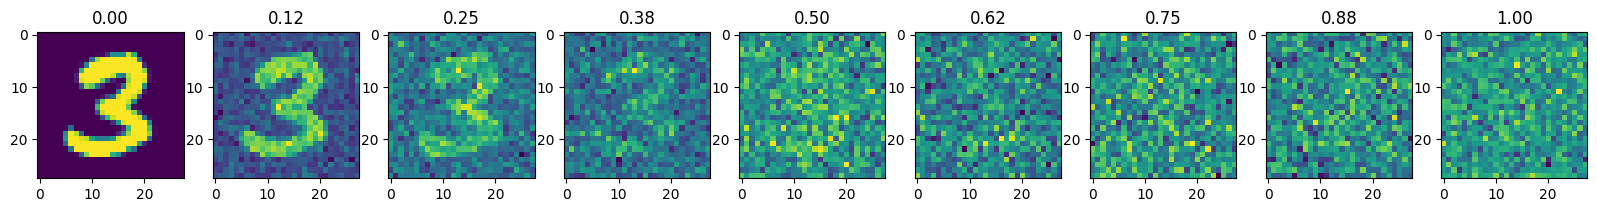

In [91]:
fig, axs = plt.subplots(1,9, figsize=(20, 2))
for i, t in enumerate(np.linspace(0., 1., num=9)):
    perturbed = perturb(image, t, sigma=5)
    axs[i].imshow(perturbed.permute(1, 2, 0).squeeze()
                  #, vmin=0., vmax=1.
                 )
    axs[i].title.set_text("{:.2f}".format(t))
plt.savefig('progressive_diffusion.pdf')  
plt.show()

In [ ]:
# TODO: implement marginal_prob_std
# TODO: implement diffusion_coeff
# TODO: implement loss_fn
# TODO: implement training